## Just trying out NN in R
Got code from [here]("https://heuristically.wordpress.com/2011/11/17/using-neural-network-for-regression/").

In [1]:
#let's see if package works
install.packages("mlbench")
library("mlbench")
data(BostonHousing)

package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dickm\AppData\Local\Temp\RtmporKt0s\downloaded_packages


### Let's see what the data looks like

In [3]:
?data

data {utils},R Documentation
...,literal character strings or names.
list,a character vector.
package,"a character vector giving the package(s) to look in for data sets, or NULL. By default, all packages in the search path are used, then the ‘data’ subdirectory (if present) of the current working directory."
lib.loc,"a character vector of directory names of R libraries, or NULL. The default value of NULL corresponds to all libraries currently known."
verbose,"a logical. If TRUE, additional diagnostics are printed."
envir,the environment where the data should be loaded.


In [3]:
sd(BostonHousing$medv)
summary(BostonHousing$medv)

[1] 9.197104

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

## Train & evaluate linear model

In [4]:
lm.fit <- lm(medv ~ ., data=BostonHousing)
 
lm.predict <- predict(lm.fit)
 
# mean squared error: 21.89483
mean((lm.predict - BostonHousing$medv)^2) 
 


[1] 21.89483

## Train & evaluate neural network

In [11]:
require(nnet)

Loading required package: nnet


### Todo
Find out why they used a scale by dividing by 50

In [12]:
# scale inputs: divide by 50 to get 0-1 range
nnet.fit <- nnet(medv/50 ~ ., data=BostonHousing, size=2) 
 
# multiply 50 to restore original scale
nnet.predict <- predict(nnet.fit)*50 
 
# mean squared error: 16.40581
mean((nnet.predict - BostonHousing$medv)^2) 


# weights:  31
initial  value 73.481874 
iter  10 value 12.402122
iter  20 value 9.233398
iter  30 value 7.913699
iter  40 value 7.575503
iter  50 value 6.592931
iter  60 value 4.625234
iter  70 value 3.669130
iter  80 value 3.499974
iter  90 value 3.384239
iter 100 value 3.330911
final  value 3.330911 
stopped after 100 iterations


[1] 16.45707

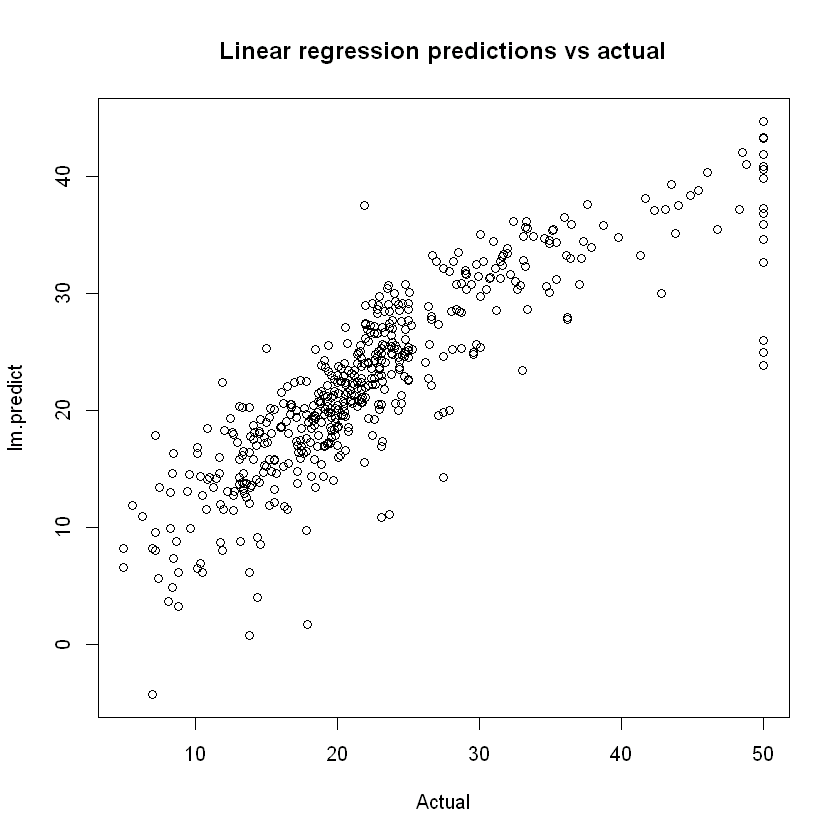

In [13]:
#Plot for linear model
plot(BostonHousing$medv, lm.predict,
    main="Linear regression predictions vs actual",
    xlab="Actual")

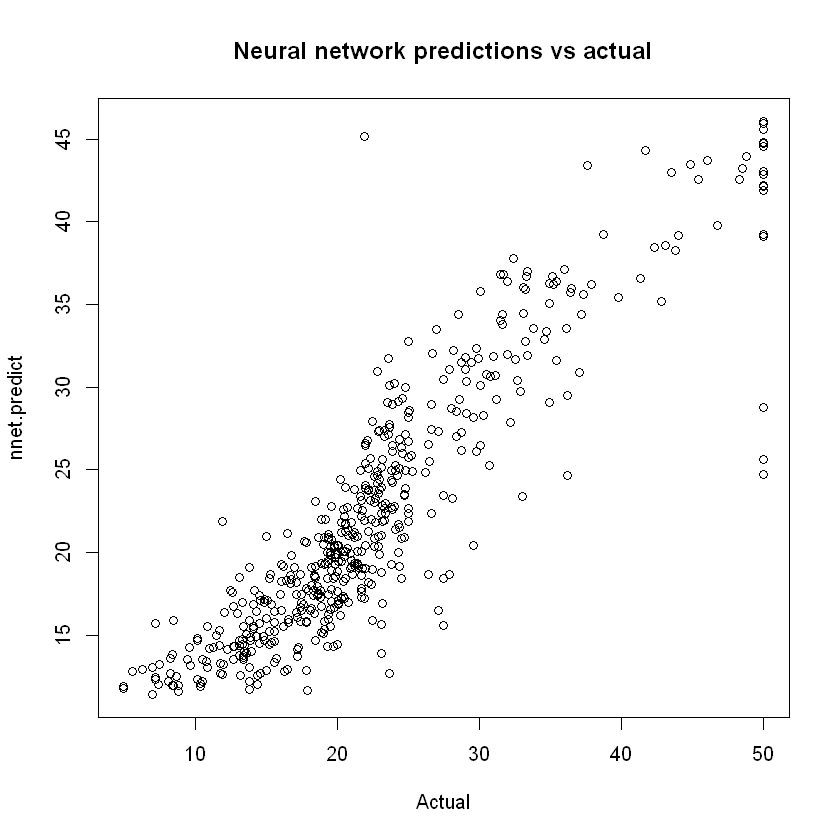

In [14]:
#Plot for NN model
plot(BostonHousing$medv, nnet.predict,
    main="Neural network predictions vs actual",
    xlab="Actual")

## Verbiage about using caret to do stuff
Now, let’s use the function train() from the package caret to optimize the neural network hyperparameters decay and size, Also, caret performs resampling to give a better estimate of the error. In this case we scale linear regression by the same value, so the error statistics are directly comparable

In [5]:
install.packages("caret")
library("caret")

also installing the dependencies 'colorspace', 'nlme', 'minqa', 'nloptr', 'RcppEigen', 'RColorBrewer', 'dichromat', 'munsell', 'labeling', 'lme4', 'SparseM', 'MatrixModels', 'gtable', 'scales', 'pbkrtest', 'quantreg', 'iterators', 'Rcpp', 'ggplot2', 'car', 'foreach', 'plyr', 'reshape2'



package 'colorspace' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'dichromat' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'iterat

Loading required package: lattice
Loading required package: ggplot2


In [18]:
mygrid <- expand.grid(.decay=c(0.5, 0.1), .size=c(4,5,6))
nnetfit <- train(medv/50 ~ ., data=BostonHousing, method="nnet", maxit=1000, tuneGrid=mygrid, trace=F) 
print(nnetfit)

Neural Network 

506 samples
 13 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 506, 506, 506, 506, 506, 506, ... 
Resampling results across tuning parameters:

  decay  size  RMSE        Rsquared   RMSE SD      Rsquared SD
  0.1    4     0.08114050  0.8014391  0.006631922  0.03181528 
  0.1    5     0.08165013  0.7986289  0.008090695  0.03771731 
  0.1    6     0.08021572  0.8052543  0.005885104  0.03287962 
  0.5    4     0.08896970  0.7696091  0.006105955  0.03233259 
  0.5    5     0.08755432  0.7763989  0.005993640  0.02664656 
  0.5    6     0.08639372  0.7824328  0.005307708  0.02838074 

RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were size = 6 and decay = 0.1. 


In [19]:
lmfit <- train(medv/50 ~ ., data=BostonHousing, method="lm") 
print(lmfit)

Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 506, 506, 506, 506, 506, 506, ... 
Resampling results

  RMSE        Rsquared   RMSE SD      Rsquared SD
  0.09582199  0.7374233  0.008779893  0.04274755 

 
